#### Supplement Figure 5

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


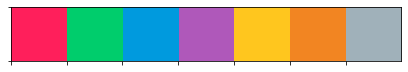

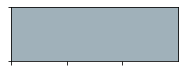

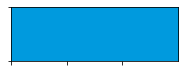

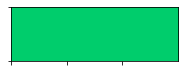

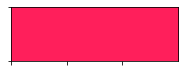

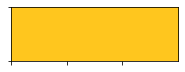

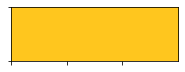

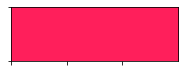

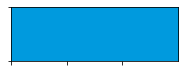

In [1]:
%matplotlib inline
%run settings_load.py

##### summary plots meanfit

In [12]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2_meanfit.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2_meanfit.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3_meanfit.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

100 288 588 976


In [13]:
net_names = [est.net.net_name for est in res]
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
model_probs = me.selection.compute_model_probabilities(res, mprior=mprior)
print(len(model_probs))

1.000000000000017
976


9.660971146773869e-85
0.005014767622594951
0.42589158794281623
0.5690936444345827


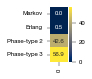

In [14]:
print(sum(model_probs[0:1]))
print(sum(model_probs[1:100]))
print(sum(model_probs[100:388]))
print(sum(model_probs[388:]))

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([model_probs[0], sum(model_probs[1:100]), sum(model_probs[100:388]), sum(model_probs[388:])]) * 100.0, index=['Markov', 'Erlang', 'Phase-type 2', 'Phase-type 3']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_sigma022_meanfit.pdf', bbox_inches='tight')

54
182
349
54
182
349
282
5.060916791223166e-86
0.0017250897262094703
0.6231397567202602
0.3751351535535344
net_3_15 par2_d_6_8_l_14 par3_d_6_6_6_l_18


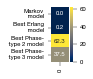

In [15]:
res1_probs = me.selection.compute_model_probabilities(res1)
res2_probs = me.selection.compute_model_probabilities(res2)
res3_probs = me.selection.compute_model_probabilities(res3)
print(list(res1_probs).index(max(res1_probs)))
print(list(res2_probs).index(max(res2_probs)))
print(list(res3_probs).index(max(res3_probs)))
print(list(model_probs[0:100]).index(max(model_probs[0:100])))
print(list(model_probs[100:388]).index(max(model_probs[100:388])))
print(list(model_probs[388:]).index(max(model_probs[388:])))
print(list(model_probs).index(max(model_probs)))

bestof_probs = me.selection.compute_model_probabilities([
                res[0], res[54], res[182+100], res[349+100+288]])

print(bestof_probs[0])
print(bestof_probs[1])
print(bestof_probs[2])
print(bestof_probs[3])

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([bestof_probs[0], bestof_probs[1], bestof_probs[2], bestof_probs[3]]) * 100.0, index=['Markov\n model', 'Best Erlang\n model', 'Best Phase-\n type 2 model', 'Best Phase-\n type 3 model']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_bestof_sigma022_meanfit.pdf', bbox_inches='tight')

print(net_names[54], net_names[182+100], net_names[349+100+288])

##### summary plots sparse data + meanfit

In [16]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2_meanfit.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2_meanfit.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par3_meanfit.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

100 288 588 976


In [17]:
net_names = [est.net.net_name for est in res]
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
model_probs = me.selection.compute_model_probabilities(res, mprior=mprior)
print(len(model_probs))

1.000000000000017
976


0.007262188363938567
0.650908888878787
0.17250468736453117
0.16932423539274372


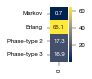

In [18]:
print(sum(model_probs[0:1]))
print(sum(model_probs[1:100]))
print(sum(model_probs[100:388]))
print(sum(model_probs[388:]))

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([model_probs[0], sum(model_probs[1:100]), sum(model_probs[100:388]), sum(model_probs[388:])]) * 100.0, index=['Markov', 'Erlang', 'Phase-type 2', 'Phase-type 3']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_thin4_meanfit.pdf', bbox_inches='tight')

37
70
202
37
70
202
37
0.0017142345131952053
0.6868242772657994
0.22953125201326033
0.08193023620774577
min_d_2_l_18 par2_d_2_2_l_14 par3_d_4_4_4_l_18


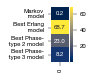

In [19]:
res1_probs = me.selection.compute_model_probabilities(res1)
res2_probs = me.selection.compute_model_probabilities(res2)
res3_probs = me.selection.compute_model_probabilities(res3)
print(list(res1_probs).index(max(res1_probs)))
print(list(res2_probs).index(max(res2_probs)))
print(list(res3_probs).index(max(res3_probs)))
print(list(model_probs[0:100]).index(max(model_probs[0:100])))
print(list(model_probs[100:388]).index(max(model_probs[100:388])))
print(list(model_probs[388:]).index(max(model_probs[388:])))
print(list(model_probs).index(max(model_probs)))

bestof_probs = me.selection.compute_model_probabilities([
                res[0], res[37], res[70+100], res[202+100+288]])

print(bestof_probs[0])
print(bestof_probs[1])
print(bestof_probs[2])
print(bestof_probs[3])

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([bestof_probs[0], bestof_probs[1], bestof_probs[2], bestof_probs[3]]) * 100.0, index=['Markov\n model', 'Best Erlang\n model', 'Best Phase-\n type 2 model', 'Best Phase-\n type 3 model']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_bestof_thin4_meanfit.pdf', bbox_inches='tight')

print(net_names[37], net_names[70+100], net_names[202+100+288])